## **<u>EDULYT INTERNSHIP**

**Importing necessary packages** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Reading the data sheet-wise**

In [2]:
data_s1 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=0)
data_s2 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=1)
data_s3 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=2)
data_s4 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=3)
data_s5 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=4)
data_s6 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=5)
data_s7 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=6)
data_s8 = pd.read_excel("Edulyt India - Data for Project - 3.xlsx", sheet_name=7)

**Data Preprocessing**

In [3]:
data_s7['month'] = data_s7["date"].astype(str).str.slice(2,4)
data_s7['month'] = data_s7['month'].astype('int')

In [4]:
data_s3.loc[data_s3[data_s3['A15']=='?'].index, 'A15'] = data_s3.loc[data_s3[data_s3['A15']=='?'].index, 'A16']
data_s3['A15'] = data_s3['A15'].astype('int')

In [5]:
data_s3.loc[data_s3[data_s3['A12']=='?'].index, 'A12'] = data_s3.loc[data_s3[data_s3['A12']=='?'].index, 'A13']
data_s3['A12'] = data_s3['A12'].astype('float')

#### **<u>Task 1:</u> Prepare a dashboard for the All the Accounts doing Credit transactions from Moravia and Prague.**

In [17]:
df1 = pd.merge(data_s1, data_s3, left_on="district_id", right_on="A1").drop(columns="A1")
df1 = df1[(df1["A3"]=="Prague") | (df1["A3"]=="south Moravia") | (df1["A3"]=="north Moravia")]

In [18]:
df1 = pd.merge(df1, data_s7, on="account_id")
df1 = df1[df1["type"] == "CREDIT"]
df1 = df1[["account_id","district_id","A3", "type", "amount", "balance", "month"]]

##### **A. Account Wise**

In [19]:
data1 = df1.groupby("account_id")['amount'].describe()
data1

,count,mean,std,min,25%,50%,75%,max
account_id,,,,,,,,
2,151.0,10575.475497,11023.663172,13.5,153.700,3700.0,20236.0,30354.0
7,50.0,12598.954000,12855.386434,30.4,267.525,11775.0,22650.0,33975.0
8,83.0,10752.618072,11309.804342,37.1,201.100,3700.0,20475.0,30712.0
9,182.0,1978.354396,5608.508669,5.4,113.225,800.0,800.0,45691.0
10,58.0,9477.331034,9837.902032,12.2,202.575,2150.0,17686.0,26529.0
...,...,...,...,...,...,...,...,...
11328,62.0,11208.104839,13164.967428,64.3,235.150,6550.0,19233.5,48485.0
11349,90.0,22172.102222,23529.258619,39.0,179.325,3600.0,41988.0,62982.0
11359,103.0,14673.384466,15101.633567,67.3,149.500,3000.0,27014.0,40521.0


##### **B. Month Wise**

In [20]:
data2 = df1.groupby("month")['amount'].describe()
data2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,14506.0,7568.395526,11130.825191,0.3,136.025,1900.0,11300.00,49983.0
2,14733.0,7240.989792,10739.039100,0.1,127.500,1700.0,10660.00,49995.0
3,14942.0,7566.343776,11185.038897,0.7,139.600,1600.0,11575.00,49972.0
4,15180.0,7532.987826,11163.252002,0.1,142.475,1300.0,11542.00,49991.0
5,15557.0,7719.644006,11376.136597,0.3,147.300,1400.0,11900.00,49959.0
6,16031.0,9666.777051,14287.496017,0.6,147.800,1600.0,15834.50,74770.0
7,16646.0,7550.380998,11072.162872,0.1,142.000,1700.0,11569.00,49998.0
8,16779.0,7628.608469,11297.966541,0.2,146.250,1500.0,11712.00,49990.0
9,17068.0,7661.119252,11295.865515,0.1,147.400,1300.0,11916.00,49999.0


##### **C. Account and Month Wise**

In [21]:
data3 = df1.groupby(["account_id", "month"])['amount'].describe()
data3

count          mean           std    min      25%      50%  \
account_id month                                                               
2          1       12.0   8610.116667  10267.706765  100.1  142.625   750.00   
           2       14.0   8251.714286   9474.020365  108.2  142.275  3450.00   
           3       13.0   9684.361538  10212.555069   13.5  144.500  3700.00   
           4       13.0   9548.915385  10307.750064  109.5  149.900  1800.00   
           5       13.0   9924.907692  10089.017854  122.2  144.700  6700.00   
...                 ...           ...           ...    ...      ...      ...   
11382      8       10.0   9365.050000  14813.629845  128.4  146.600   200.85   
           9       12.0  10355.666667  15122.840980   37.0  118.500   156.40   
           10      12.0  10368.433333  15113.397733   58.4  121.050   168.25   
           11      12.0  10378.708333  15105.822487   76.9  158.575   178.10   
           12      10.0  18600.470000  23795.250636  100.3  160.550   235.05   

                        75%      max  
account_id month                      
2          1      20236.000  20236.0  
           2      20236.000  20236.0  
           3      20236.000  20236.0  
           4      20236.000  20236.0  
           5      20236.000  20236.0  
...                     ...      ...  
11382      8      23174.425  30832.0  
           9      30832.000  30832.0  
           10     30832.000  30832.0  
           11     30832.000  30832.0  
           12     46248.000  46248.0  

[25450 rows x 8 columns]

#### **<u>Task 2:</u> Analysis on Highly populated versus Low populated districts.<br> Find out the amount of Credit and Debit transaction from 5 highly populated and 5 lowest populated areas respectively, above analysis should be from last 3 months.**


In [22]:
idx1 = data_s3['A4'].nlargest(5).index
temp_df1 = data_s3.loc[idx1]

In [23]:
idx2 = data_s3['A4'].nsmallest(5).index
temp_df2 = data_s3.loc[idx2]

In [24]:
temp_df = pd.merge(data_s1, temp_df1, left_on="district_id", right_on="A1").drop(columns="A1")
temp_df = pd.merge(data_s7[data_s7['month']>=10], temp_df, on="account_id")
temp_df[["district_id", "type", "amount"]].groupby("type")['amount'].sum()

type
CREDIT    2.207302e+08
DEBIT     2.010082e+08
Name: amount, dtype: float64

In [25]:
temp_df = pd.merge(data_s1, temp_df2, left_on="district_id", right_on="A1").drop(columns="A1")
temp_df = pd.merge(data_s7[data_s7['month']>=10], temp_df, on="account_id")
temp_df[["district_id", "type", "amount"]].groupby("type")['amount'].sum()

type
CREDIT    5.232126e+07
DEBIT     4.758565e+07
Name: amount, dtype: float64

<u>**Observation**</u>: <br>-- Amount of Credit from 5 highly populated districts: 2.207302e+08</br>
<br>-- Amount of Debit from 5 highly populated districts: 2.010082e+08</br>
<br>-- Amount of Credit from 5 lowest populated districts: 5.232126e+07</br>
<br>-- Amount of Debit from 5 lowest populated districts: 4.758565e+07</br>

#### **<u>Task 3:</u> How many cards are issued to mid age females?**

In [26]:
temp_df = pd.merge(data_s5.loc[(data_s5['gender']=="FEMALE")&(data_s5['age_levels']=="MIDDLE AGED")], data_s6, on="client_id")
data4 = pd.merge(temp_df, data_s2, on="disp_id")
data4

,Unnamed: 0,client_id,birth_number,district_id,gender,age,age_levels,disp_id,account_id,type_x,card_id,type_y,issued
0,73,77,560218,1,FEMALE,43,MIDDLE AGED,77,66,OWNER,10,CLASSIC,961207
1,83,87,461117,72,FEMALE,53,MIDDLE AGED,87,73,OWNER,13,CLASSIC,940629
2,119,127,501227,21,FEMALE,49,MIDDLE AGED,127,105,OWNER,17,CLASSIC,980607
3,137,146,611219,31,FEMALE,38,MIDDLE AGED,146,122,OWNER,23,CLASSIC,981003
4,149,158,450703,40,FEMALE,54,MIDDLE AGED,158,132,OWNER,25,CLASSIC,971206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,5252,12378,460827,76,FEMALE,53,MIDDLE AGED,12070,10065,OWNER,1154,CLASSIC,980905
223,5267,12577,500505,62,FEMALE,49,MIDDLE AGED,12269,10227,OWNER,1164,CLASSIC,960812
224,5272,12643,620720,69,FEMALE,37,MIDDLE AGED,12335,10280,OWNER,1167,CLASSIC,980718
225,5280,12750,400525,21,FEMALE,59,MIDDLE AGED,12442,10361,OWNER,1173,CLASSIC,970508


In [28]:
data4['card_id'].count()

227

<u>**Observation**</u>: 227 cards are issued to mid age females

#### **<u>Type 4:</u> Number of cards issued in district where average salary is more than 9000, is it a good strategy?**

In [29]:
temp_df = pd.merge(data_s3[data_s3['A11']>9000][['A1','A11']], data_s5, left_on="A1", right_on="district_id")
data5 = pd.merge(pd.merge(temp_df, data_s6, on="client_id"), data_s2, on = "disp_id")
data5

,A1,A11,Unnamed: 0,client_id,birth_number,district_id,gender,age,age_levels,disp_id,account_id,type_x,card_id,type_y,issued
0,1,12541,73,77,560218,1,FEMALE,43,MIDDLE AGED,77,66,OWNER,10,CLASSIC,961207
1,1,12541,79,83,781225,1,FEMALE,21,YOUTH,83,71,OWNER,12,JUNIOR,960911
2,1,12541,104,112,350125,1,MALE,64,MIDDLE AGED,112,95,OWNER,14,CLASSIC,960217
3,1,12541,320,339,660730,1,MALE,33,ADULT,339,281,OWNER,56,CLASSIC,981122
4,1,12541,346,365,300109,1,MALE,69,SENIOR,365,300,OWNER,59,CLASSIC,971027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,74,10673,4902,7422,581126,74,MALE,41,MIDDLE AGED,7422,6148,OWNER,890,CLASSIC,960908
437,74,10673,4930,7862,651017,74,MALE,34,ADULT,7862,6510,OWNER,924,CLASSIC,981224
438,74,10673,4956,8359,791206,74,MALE,20,YOUTH,8359,6924,OWNER,946,JUNIOR,980228
439,74,10673,5024,9593,680128,74,FEMALE,31,ADULT,9285,7753,OWNER,1005,CLASSIC,931107


In [30]:
data5['card_id'].count()

441

<u>**Observation**</u>: 441 cards issued in district where average salary is more than 9000. It is good strategy as nearly 49% of the whole population with good average income has been issued card. 

#### **<u>Task 5:</u> Are we providing loans to members belonging to district where committed crimes are more than 6000 for code 95, if yes then provide the number of loans per district?**


In [32]:
temp_df = pd.merge(data_s3[data_s3['A15']>6000][['A1', 'A15']], data_s1, right_on="district_id", left_on="A1")
data6 = pd.merge(temp_df, data_s4, on="account_id").groupby('district_id')['loan_id'].count()
data6

district_id
1     84
14     8
26     6
40     6
41     3
47    10
54    24
70    24
72    14
74    20
Name: loan_id, dtype: int64

<u>**Observation**</u>: Yes loans are provided to districts where committed crimes are more than 6000 for year '95

#### **<u>Task 6:</u> How much money was collected from other banks for customer belongs to districts where unemployment rate for any year is greater than 2%.**

In [33]:
temp_df1 = data_s3[(data_s3['A12']>2)|(data_s3['A13']>2)]
temp_df2 = data_s7[data_s7['operation'] == "COLLECTION FROM ANOTHER BANK"]
data7 = pd.merge(pd.merge(temp_df1, data_s1, left_on="A1", right_on="district_id"), temp_df2, on = "account_id")
data7

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,district_id,frequency,Unnamed: 0,date,type,operation,amount,balance,k_symbol,month
0,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,3,MONTHLY ISSUANCE,3654,930606,CREDIT,COLLECTION FROM ANOTHER BANK,4350.0,5250.0,OLD AGE PENSION,6
1,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,3,MONTHLY ISSUANCE,5570,930706,CREDIT,COLLECTION FROM ANOTHER BANK,4350.0,9600.0,OLD AGE PENSION,7
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,3,MONTHLY ISSUANCE,8050,930806,CREDIT,COLLECTION FROM ANOTHER BANK,4350.0,13950.0,OLD AGE PENSION,8
3,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,3,MONTHLY ISSUANCE,11050,930906,CREDIT,COLLECTION FROM ANOTHER BANK,4350.0,18300.0,OLD AGE PENSION,9
4,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,3,MONTHLY ISSUANCE,14538,931006,CREDIT,COLLECTION FROM ANOTHER BANK,4350.0,22650.0,OLD AGE PENSION,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48365,77,Vsetin,north Moravia,148545,8,35,12,3,4,53.5,...,77,MONTHLY ISSUANCE,933504,980806,CREDIT,COLLECTION FROM ANOTHER BANK,3082.0,18458.2,NaN,8
48366,77,Vsetin,north Moravia,148545,8,35,12,3,4,53.5,...,77,MONTHLY ISSUANCE,959129,980906,CREDIT,COLLECTION FROM ANOTHER BANK,3082.0,19539.1,NaN,9
48367,77,Vsetin,north Moravia,148545,8,35,12,3,4,53.5,...,77,MONTHLY ISSUANCE,984588,981006,CREDIT,COLLECTION FROM ANOTHER BANK,3082.0,19571.7,NaN,10
48368,77,Vsetin,north Moravia,148545,8,35,12,3,4,53.5,...,77,MONTHLY ISSUANCE,1010304,981106,CREDIT,COLLECTION FROM ANOTHER BANK,3082.0,19214.7,NaN,11


In [34]:
data7['amount'].sum()

571773129.0

<u>**Observation**</u>: Money collected: 571773129 from districts where unemployment rate > 2%

#### **<u>Task 8:</u> Create profile of customers in accordance of districts for the status of loan payment, there will be 4 categories.**

In [55]:
df = pd.merge(pd.merge(data_s3, data_s1, left_on="A1", right_on="district_id"), data_s4, on="account_id")
data8 = df.groupby(["district_id", "account_id"])['status'].value_counts().unstack()
data8.fillna(0, inplace = True)
data8

status                    A    B    C    D
district_id account_id                    
1           2           1.0  0.0  0.0  0.0
            426         0.0  0.0  0.0  1.0
            718         1.0  0.0  0.0  0.0
            1603        1.0  0.0  0.0  0.0
            1869        0.0  0.0  1.0  0.0
...                     ...  ...  ...  ...
77          4268        0.0  0.0  1.0  0.0
            4631        0.0  0.0  1.0  0.0
            5228        1.0  0.0  0.0  0.0
            7181        0.0  0.0  1.0  0.0
            8321        0.0  0.0  1.0  0.0

[682 rows x 4 columns]

#### **<u>Task 9:</u> Relate the output of above with district conditions like Crime, Unemployment Rate and Average Salary.**

In [61]:
conditions = ['A11', 'A13', 'A15']
status = ['A', 'B', 'C', 'D']

temp_df = df.groupby(["district_id", "status"])['account_id'].count().unstack().fillna(0)

for i in conditions:
    for j in status:
        print(f"Correlation between {i} and {j}: {data_s3[i].corr(temp_df[j])}", end = '\n')

Correlation between A11 and A: -0.14087481096430365
Correlation between A11 and B: -0.06336189058909877
Correlation between A11 and C: -0.14656710401726053
Correlation between A11 and D: 0.06715330701800101
Correlation between A13 and A: -0.04836274191555114
Correlation between A13 and B: -0.1928867970492592
Correlation between A13 and C: -0.02708600909942556
Correlation between A13 and D: -0.02862844678566557
Correlation between A15 and A: -0.06448339216693261
Correlation between A15 and B: -0.05035711397663354
Correlation between A15 and C: -0.11349829075838909
Correlation between A15 and D: 0.21207398151545248


#### **<u>Task 11:</u> Can we say customers from Bohemia are the ones having more male customers possessing Gold cards in comparison of Moravia?**

In [62]:
temp_df1 = pd.merge(data_s3[(data_s3["A3"]=="south Moravia") | (data_s3["A3"]=="north Moravia")], data_s5, left_on="A1", right_on="district_id")
temp_df2 = pd.merge(data_s3[(data_s3["A3"]=="central Bohemia") | (data_s3["A3"]=="north Bohemia") | (data_s3["A3"]=="south Bohemia") | (data_s3["A3"]=="east Bohemia") | (data_s3["A3"]=="west Bohemia")], data_s5, left_on="A1", right_on="district_id")

In [63]:
temp_df1 = temp_df1[temp_df1['gender']=="MALE"]
temp_df2 = temp_df2[temp_df2['gender']=="MALE"]

In [75]:
data9 = pd.merge(pd.merge(temp_df1, data_s6, on="client_id"), data_s2, on="disp_id")['type_y']
print("Male customers from Moravia possessing Gold cards: ", data9.value_counts().loc["GOLD",]
)

Male customers from Moravia possessing Gold cards:  18


In [76]:
data10 = pd.merge(pd.merge(temp_df2, data_s6, on="client_id"), data_s2, on="disp_id")['type_y']
print("Male customers from Bohemia possessing Gold cards: ", data10.value_counts().loc["GOLD",])

Male customers from Bohemia possessing Gold cards:  28


<u>**Observation**</u>: Male customers from Bohemia are possessing more gold cards than Moravia

#### **<u>Task 12:</u> How many customers having credit card are also availing the loan facilities.**

In [66]:
data11 = pd.merge(pd.merge(data_s6, data_s2, on='disp_id'), data_s4, on="account_id")
len(data11['card_id'])

170

<u>**Observation**</u>: 170 customers having credit cards are also availing the loan facilities

#### **<u>Task 13:</u> Can we say that customers having Classic and Junior card are the ones who are more in debt.**

In [67]:
data11[(data11['type_y']=="CLASSIC")|(data11['type_y']=="JUNIOR")]['status'].value_counts()

C    98
A    52
D     2
B     2
Name: status, dtype: int64

<u>**Observation**</u>: No, only 2 customers are in debt having Classic and Junior cards

#### **<u>Task 14:</u> How will you analyze the performance of Mid age vs adults in terms of loan repayments.**

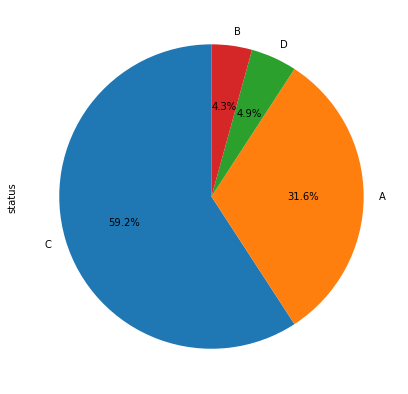

In [68]:
data12 = pd.merge(pd.merge(data_s6, data_s5[data_s5['age_levels']=='MIDDLE AGED'], on="client_id"), data_s4, on="account_id")['status'].value_counts()
ax = data12.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7,7))
plt.show()

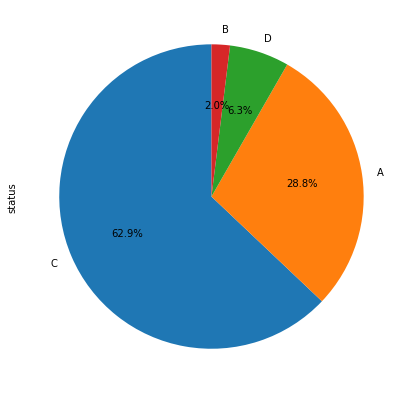

In [69]:
data13 = pd.merge(pd.merge(data_s6, data_s5[data_s5['age_levels']=='ADULT'], on="client_id"), data_s4, on="account_id")['status'].value_counts()
ax = data13.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7,7))
plt.show()

<u>**Observation**</u>: Adults fared better than Mid age in terms of loan repayment

### **<u>Exporting data to Excel</u>**

In [78]:
with pd.ExcelWriter('Output.xlsx') as writer:

    data2.to_excel(writer, sheet_name='Task_1B')
    data1.to_excel(writer, sheet_name='Task_1A')
    data3.to_excel(writer, sheet_name='Task_1C')
    data4.to_excel(writer, sheet_name='Task_3')
    data5.to_excel(writer, sheet_name='Task_4')
    data6.to_excel(writer, sheet_name='Task_5')
    data7.to_excel(writer, sheet_name='Task_6')
    data8.to_excel(writer, sheet_name='Task_8')
    data9.to_excel(writer, sheet_name='Task_11(a)')
    data10.to_excel(writer, sheet_name='Task_11(b)')
    data11.to_excel(writer, sheet_name='Task_12')
    data12.to_excel(writer, sheet_name='Task_13')
    data13.to_excel(writer, sheet_name='Task_14')